CSC 445 Honors Contract - Dynamic Programming and Network Flow

In [122]:
import matplotlib.pyplot as plt
import random
import string
import time

Dynamic Programming (LCS)

In [123]:
def lcs(m, n):
    m_len, n_len = len(m), len(n)
    lens = [[0 if i == 0 or j == 0 else None for j in range(m_len + 1)] for i in range(n_len + 1)]
    traces = [[None] * m_len for i in range(n_len)]
    for i in range(1, n_len + 1):
        for j in range(1, m_len + 1):
            if n[i - 1] == m[j - 1]:
                lens[i][j] = lens[i - 1][j - 1] + 1
                traces[i - 1][j - 1] = "↖"
            elif lens[i - 1][j] >= lens[i][j - 1]:
                lens[i][j] = lens[i - 1][j]
                traces[i - 1][j - 1] = "↑"
            else:
                lens[i][j] = lens[i][j - 1]
                traces[i - 1][j - 1] = "←"

    i, j, lcs = n_len - 1, m_len - 1, ""
    while i >= 0 and j >= 0:
        if traces[i][j] == "↖":
            lcs += n[i]
            i -= 1
            j -= 1
        elif traces[i][j] == "↑":
            i -= 1
        else:
            j -= 1
    return lcs[::-1]


print(lcs("ACCGGTCGAGTGCGCGGAAGCCGGCCGAA", "GTCGTTCGGAATGCCGTTGCTCTGTAAA"))

GTCGTCGGAAGCCGGCCGAA


LCS Time Complexity

In [124]:
def testLCS(startN=0, endN=1000, stepSize=50, numTrials=10):
    nValues, tValues = [], []
    for N in range(startN, endN, stepSize):
        runtime = 0
        for trial in range(numTrials):
            start = time.time()
            m = "".join(random.choices(string.ascii_lowercase, k=N))
            n = "".join(random.choices(string.ascii_lowercase, k=N))
            lcs(m, n)
            runtime += (time.time() - start) * 1000
        runtime /= numTrials
        nValues.append(N), tValues.append(runtime)
    return nValues, tValues

nValues, tValues = testLCS()

Text(0.5, 1.0, 'LCS Time Complexity')

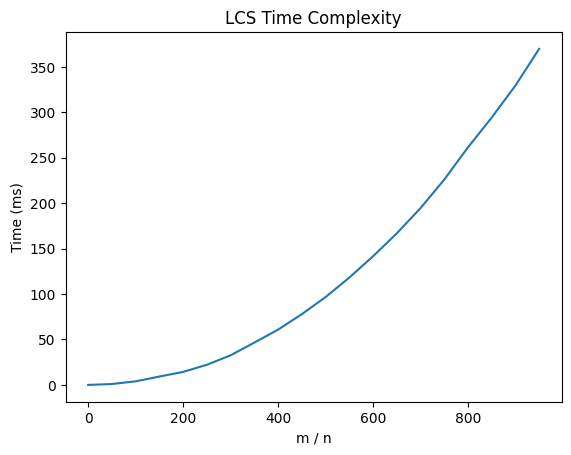

In [127]:
plt.plot(nValues, tValues)
plt.xlabel("m / n")
plt.ylabel("Time (ms)")
plt.title("LCS Time Complexity")

Network Flow (MCBM)

In [146]:
def MCBM(graph):
    graph.append({"id": graph[-1]["id"] + 1, "edges": []})
    graph.append({"id": graph[-1]["id"] + 1, "edges": []})
    for v in graph:
        if v["id"] < graph[-2]["id"]:
            if v["edges"]:
                graph[-2]["edges"].append({"target": graph[v["id"]]})
            else:
                v["edges"].append({"target": graph[-1]})
        for edge in v["edges"]:
            edge["cap"] = 0
            edge["maxCap"] = 1
    for v in graph:
        for edge in v["edges"]:
            if edge["maxCap"] == 1:
                edge["target"]["edges"].append({"target": v, "cap": 0, "maxCap": 0})
    print(len(graph))
    return graph
    #for v in graph:
        #print(f"id: {v['id']}")
        #print("edges:")
        #for edge in v["edges"]:
            #print(edge["target"]["id"])

    #return graph

graph = []
for id in range(9):
    graph.append({"id": id, "edges": []})
graph[0]["edges"].append({"target": graph[5]})
graph[1]["edges"].append({"target": graph[5]})
graph[1]["edges"].append({"target": graph[7]})
graph[2]["edges"].append({"target": graph[6]})
graph[2]["edges"].append({"target": graph[7]})
graph[2]["edges"].append({"target": graph[8]})
graph[3]["edges"].append({"target": graph[7]})
graph[4]["edges"].append({"target": graph[7]})
MCBM(graph)

11


[{'id': 0,
  'edges': [{'target': {'id': 5,
     'edges': [{'target': {'id': 10,
        'edges': [{'target': {...}, 'cap': 0, 'maxCap': 0},
         {'target': {'id': 6,
           'edges': [{'target': {...}, 'cap': 0, 'maxCap': 1},
            {'target': {'id': 2,
              'edges': [{'target': {...}, 'cap': 0, 'maxCap': 1},
               {'target': {'id': 7,
                 'edges': [{'target': {...}, 'cap': 0, 'maxCap': 1},
                  {'target': {'id': 1,
                    'edges': [{'target': {...}, 'cap': 0, 'maxCap': 1},
                     {'target': {...}, 'cap': 0, 'maxCap': 1},
                     {'target': {'id': 9,
                       'edges': [{'target': {...}, 'cap': 0, 'maxCap': 1},
                        {'target': {...}, 'cap': 0, 'maxCap': 1},
                        {'target': {...}, 'cap': 0, 'maxCap': 1},
                        {'target': {'id': 3,
                          'edges': [{'target': {...}, 'cap': 0, 'maxCap': 1},
                